In [29]:
from analysis_v3 import *
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
struct_104, struct_g104w3, struct_104oh6, struct_104oh6w6, struct_goh3, struct_gef3, struct_ghole1, struct_gcarbo5_H1, struct_gep3oh6 = load_structures()

In [183]:
struct = struct_gep3oh6
columns = []
columns = struct.matrix_frame.columns[:(struct.matrix_frame.shape[1] - 3) // 2]
data = struct.matrix_frame[[*columns, 'freq', 'intensity']]
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', None)

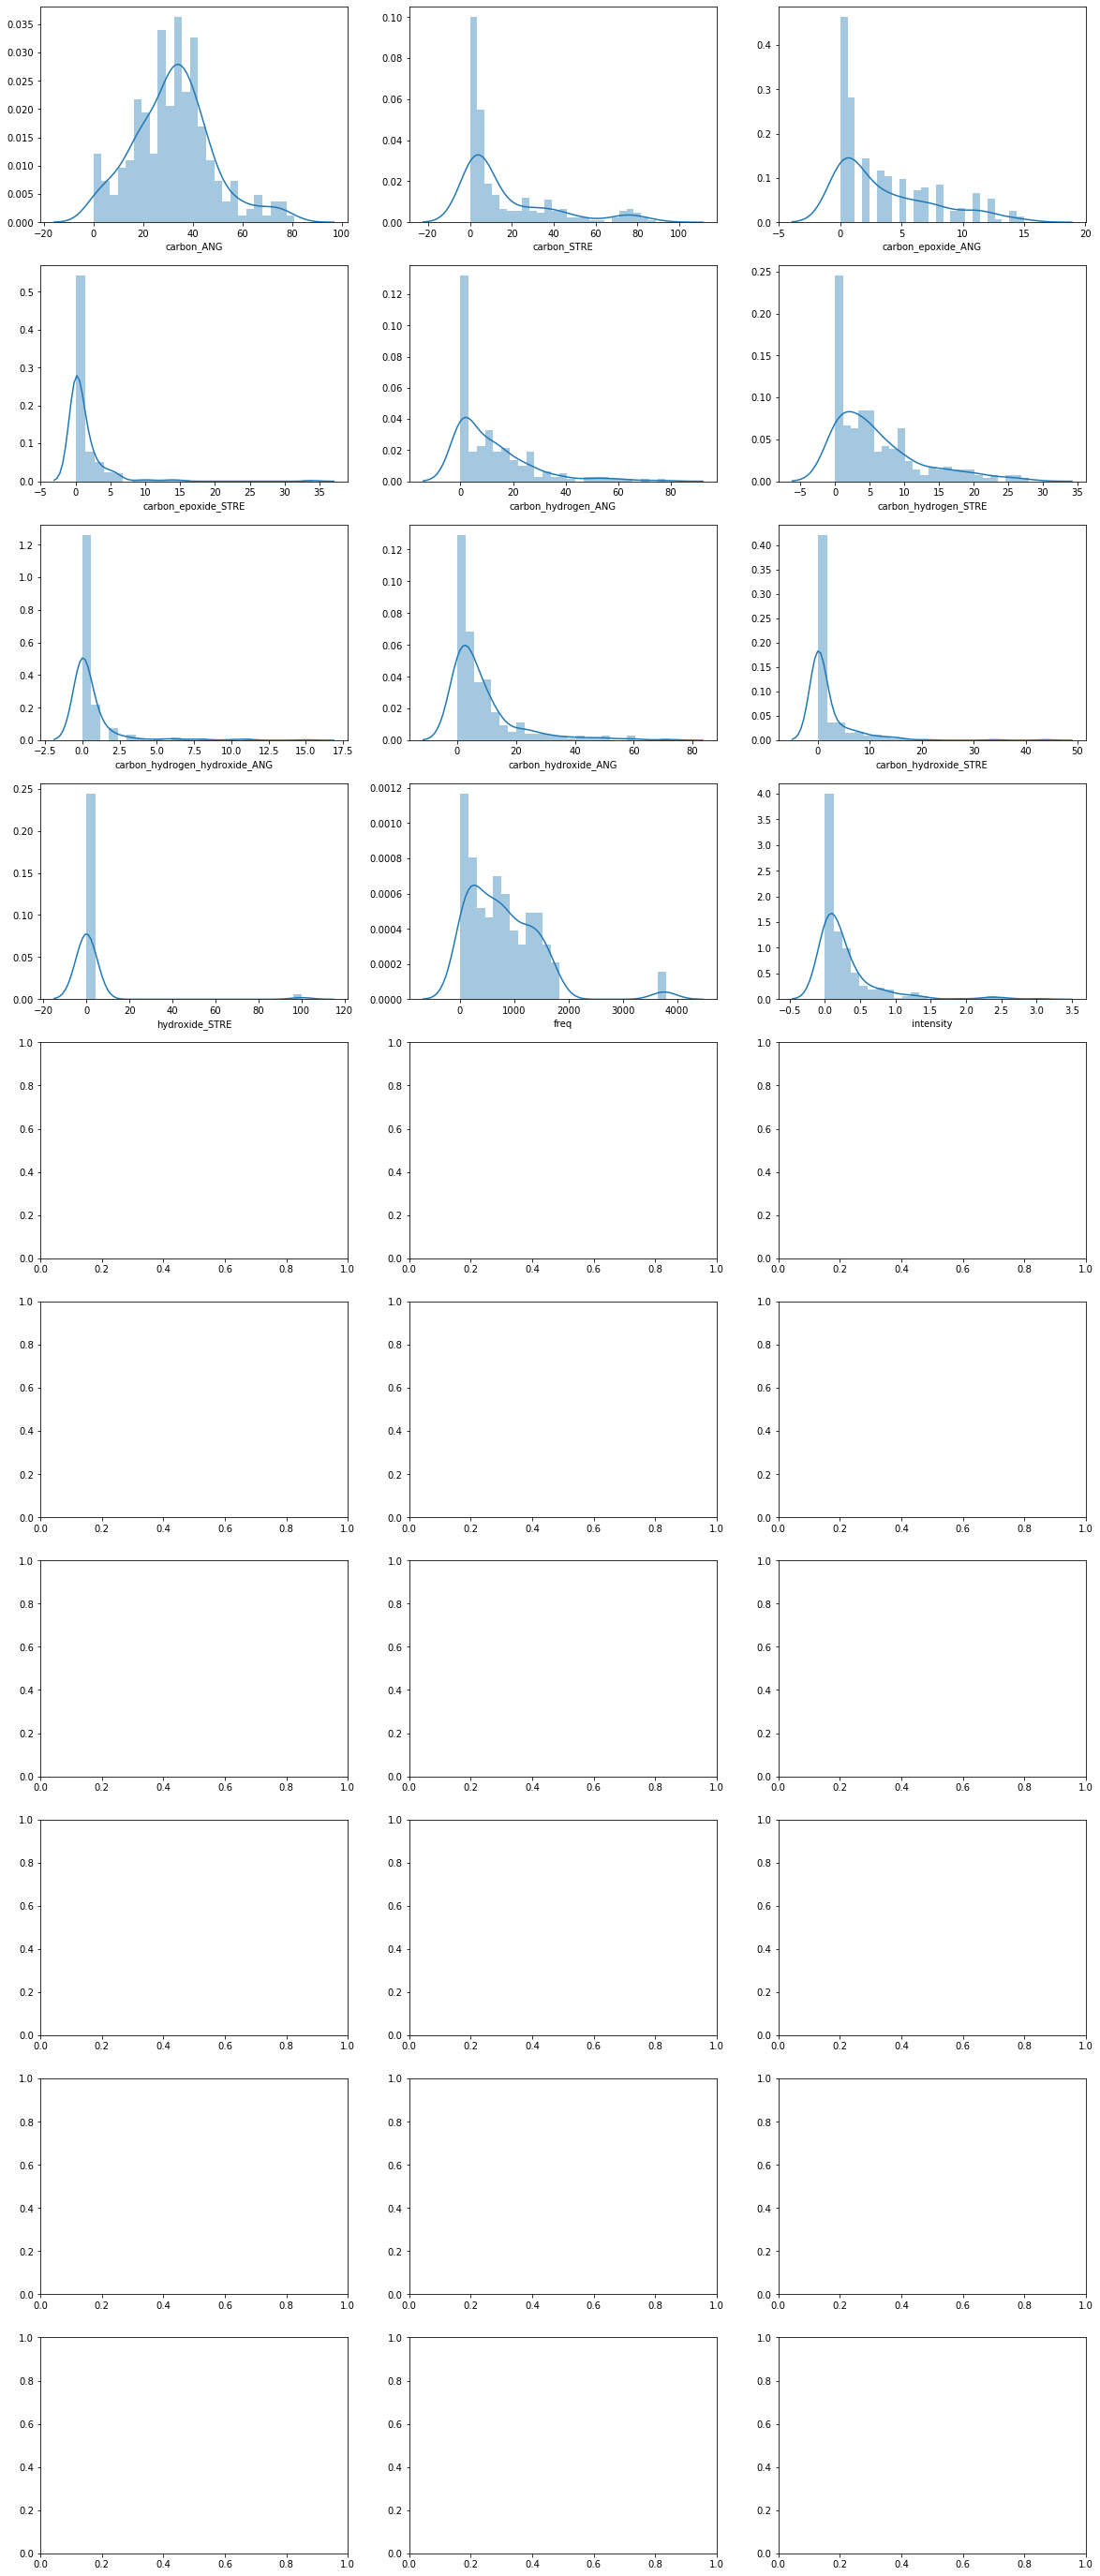

In [184]:
fig, axes = plt.subplots(10, 3, figsize=(20, 50))
for i, column in enumerate(data.columns): 
        sns.distplot(data[column], ax=axes[i // 3, i % 3], bins=25)

In [54]:
from sklearn import svm

In [163]:
res1 = []
gammas = [x for x in range(1, 100)]
for gamma in gammas:
    svm_ = svm.OneClassSVM(gamma=gamma, nu=0.01, random_state=42) 
    svm_.fit(data['water_STRE'].values.reshape(-1, 1))
    labels = svm_.predict(data['water_STRE'].values.reshape(-1, 1))
    res1.append(abs(labels.mean()))
    
res2 = []
gammas = [x for x in range(1, 100)]
for gamma in gammas:
    svm_ = svm.OneClassSVM(gamma=gamma, nu=0.02, random_state=42) 
    svm_.fit(data['water_STRE'].values.reshape(-1, 1))
    labels = svm_.predict(data['water_STRE'].values.reshape(-1, 1))
    res2.append(abs(labels.mean()))

C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_s

C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)
C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_s

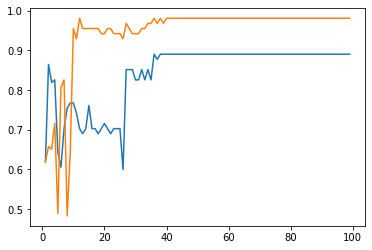

In [164]:
plt.plot(gammas, res1)
plt.plot(gammas, res2)

In [193]:
svm_ = svm.OneClassSVM(gamma=10, nu=0.01, random_state=42) 
svm_.fit(data)
labels = svm_.predict(data.drop(['freq', 'intensity'], axis=1))
print(data['freq'].loc[labels == -1].shape)
print(data[['intensity']].loc[labels == 1].mean())
print(data[['intensity']].loc[labels == -1].mean())

C:\Users\lisav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


ValueError: X.shape[1] = 10 should be equal to 12, the number of features at training time